In [54]:
import math
import numpy as np
import numpy.random as rd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from statistics import mean
from statistics import variance
from scipy.stats import gaussian_kde
import statistics
import seaborn as sns
import time

In [55]:
# this function generates given no of random numbers from [0,1]
# Xo is the seed
# full period if m is a power of 2, c is odd and a is 4*n + 1
def Uniform_Distribution(Xo, m, a, c,N):
    arr1 = []
    arr = []
    arr1.append(Xo%m)
    for i in range(1, N):
        arr1.append((arr1[i - 1] * a + c) % m)
    for i in range(0,N):
        arr.append(arr1[i]/m)
    return arr

In [56]:
# it gives N random numbers from F(x) = 1-expo(-x/theta) distribution
def Exponential_Distribution(N,θ):
#     generating form uniform [0,1]
    U = Uniform_Distribution(34,2**60,17,21,N)
    expo = []
    for i in range(0,N):
#     applying inverse of CDF on unifom [0,1]
        num = -θ*math.log(U[i])
        expo.append(num)
    return expo

In [57]:
def Box_Muller(N):
# generating random theta between 0 to 2*pi
    U = Uniform_Distribution(1, 2**50, 5, 7, N)
    random_theta = []
    for i in range(0,N):
        random_theta.append(U[i]*2*np.pi)

# generating exponential of mean 1
    expo = Exponential_Distribution(N, 1)

# generating N(0,1) 
    out1 = np.zeros(N)
    out2 = np.zeros(N)
    for i in range(N):
        theta = random_theta[i]
        E = expo[i]
        x = np.sin(theta)*np.sqrt(2*E)
        y = np.cos(theta)*np.sqrt(2*E)
        out1[i] = x
        out2[i] = y
    return out1,out2

[[1 0]
 [0 2]]


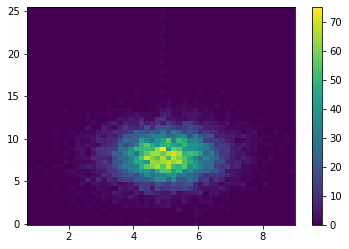

In [58]:
d = 2
a = 0
µ = np.array([5, 8])
N = 10000
Z1=[]
Z2=[]

Z1, Z2 = Box_Muller(N)
Σ = np.array([[1, 2*a], [2*a, 4]])
A = np.array([[0]*d]*d) # in general A=[[0]*cols]*rows
Z = np.array([Z1, Z2])

# filling matrix A such that AA'= Σ
for i in range(0,d):
    for j in range(0,d):
        if j<i:
            s = 0
            for k in range(0,j):
                s = s + A[i][k]*A[j][k]
            A[i][j] = (Σ[i][j] - s)/A[j][j]
        elif j==i:
            s = 0
            for k in range(0,i):
                s = s + A[i][k]*A[i][k]
            A[i][i] = np.sqrt(Σ[i][i] - s)
        else:
            A[i][j] = 0

print(A)
X = np.dot(A, Z)
for i in range(0,d):
    for j in range(0,N):
        X[i][j] = X[i][j] + µ[i]

plt.figure()
plt.hist2d(X[0], X[1], 50)
plt.colorbar()
plt.show()